### 特征脸

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [4]:
 faces

{'data': array([[ 34.      ,  29.333334,  22.333334, ...,  14.666667,  16.      ,
          14.      ],
        [158.      , 160.66667 , 169.66667 , ..., 138.66667 , 135.66667 ,
         130.33333 ],
        [ 76.666664,  81.      ,  87.666664, ..., 191.66667 , 145.33333 ,
          66.      ],
        ...,
        [ 38.333332,  41.666668,  55.      , ...,  66.      ,  63.333332,
          54.666668],
        [ 16.666666,  24.333334,  60.333332, ..., 219.      , 144.      ,
          69.      ],
        [ 58.333332,  48.      ,  20.      , ..., 116.      , 105.666664,
         143.66667 ]], dtype=float32),
 'images': array([[[ 34.      ,  29.333334,  22.333334, ...,  20.      ,
           26.      ,  31.      ],
         [ 37.333332,  32.      ,  25.333334, ...,  21.      ,
           27.      ,  32.      ],
         [ 33.333332,  32.      ,  40.333332, ...,  23.333334,
           28.666666,  35.666668],
         ...,
         [166.      ,  96.666664,  44.666668, ...,   9.333333,
     

In [5]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [7]:
faces.data.shape

(13233, 2914)

In [8]:
# 相当于把每一个样本以二维的形式展现出来，对于每一个样本来说都是一个 62 * 47 的图像
faces.images.shape

(13233, 62, 47)

In [9]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]

In [10]:
example_faces = X[:36, :]
example_faces.shape

(36, 2914)

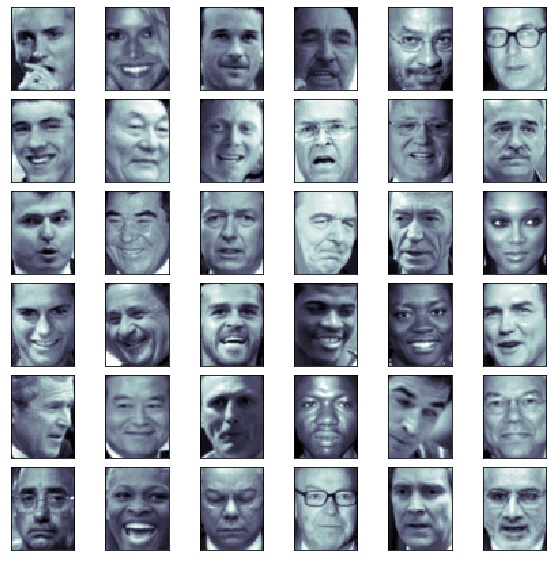

In [13]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize = (10, 10),
                            subplot_kw = {'xticks':[], 'yticks':[]},
    gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62,47), cmap = 'bone')
        
plot_faces(example_faces)

In [14]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [15]:
len(faces.target_names)

5749

### 特征脸

In [16]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized')
pca.fit(X)

Wall time: 47.3 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [18]:
pca.components_.shape

(2914, 2914)

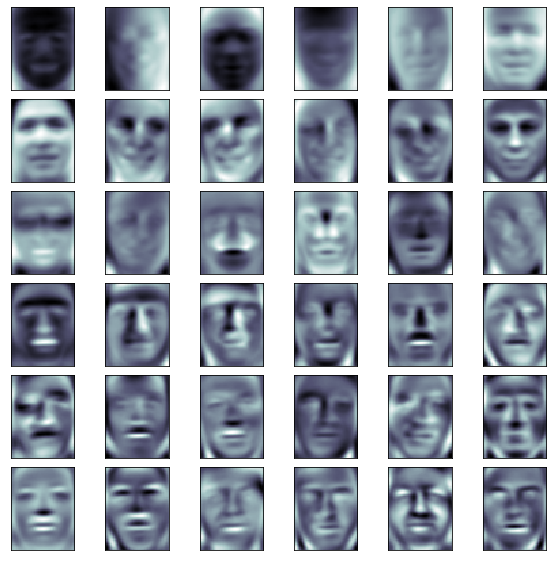

In [19]:
plot_faces(pca.components_[:36, :])

In [22]:
faces2 = fetch_lfw_people(min_faces_per_person = 60)
faces2.data.shape

(1348, 2914)

In [23]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [24]:
len(faces.target_names)

5749